<a href="https://colab.research.google.com/github/arikinhafln/TelecomX/blob/main/Telecom_X_An%C3%A1lise_de_Evas%C3%A3o_de_Clientes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Telecom X - Análise de Evasão de Clientes.**




 Neste desafio fui contratado como assistente de análise de dados na Telecom X e farei parte do projeto "Churn de Clientes". A empresa enfrenta um alto índice de cancelamentos e precisa entender os fatores que levam à perda de clientes.

 Meu desafio será coletar, tratar e analisar os dados, utilizando Python e suas principais bibliotecas para extrair insights valiosos. A partir da minha análise, os demais colegas da equipe de Data Science poderá avançar para modelos preditivos e desenvolver estratégias para reduzir a evasão.

O que irei praticar:
- Importar e manipular dados de uma API de forma eficiente.
- Aplicar os conceitos de ETL (Extração, Transformação e Carga) na preparação dos dados.
- Criar visualizações de dados estratégicas para identificar padrões e tendências.
- Realizar uma Análise Exploratória de Dados (EDA) e gerar um relatório com insights relevantes.

In [2]:
import pandas as pd                                                             # Importação para manipulação e análise de dados.
import numpy as np                                                              # Importação para operações numéricas, arrays e funções matemáticas.
import requests                                                                 # Importação para fazer requisições HTTP (ex: consumir APIs).
import matplotlib.pyplot as plt                                                 # Importação para criação de gráficos estáticos.
import json                                                                     # Importação para permite trabalhar com dados no formato JSON (ler, escrever e manipular).
import seaborn as sns                                                           # Importação para facilita a criação de gráficos estatísticos mais elegantes.
import plotly.express as px                                                     # Importação para criar gráficos interativos de forma simples.

###**Extração (E - Extract).**

Para iniciar a análise, precisaremos importar os dados da API da Telecom X. Esses dados estão disponíveis no formato JSON e contêm informações essenciais sobre os clientes, incluindo dados demográficos, tipo de serviço contratado e status de evasão.

O que irei fazer:
- Carregar os dados diretamente da API utilizando Python.
- Converter os dados para um DataFrame do Pandas para facilitar a manipulação.

In [3]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'      # Extração do link.
response = requests.get(url)                                                                                           # Fazendo a requisição.
data = response.json()                                                                                                 # Convertendo os dados em JSON.
df = pd.DataFrame(data)                                                                                                # Criando um DataFrame com os dados.
df.head()                                                                                                              # Exibindo as primeiras linhas do DataFrame.

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
df = pd.json_normalize(data)                                                    # Normalizando os dados JSON.
df.head()                                                                       # Exibindo as primeiras linhas do DataFrame.

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


###**Transformação (T - Transform).**

Agora que extrai os dados, é fundamental entender a estrutura do dataset e o significado de suas colunas. Essa etapa ajudará a identificar quais variáveis são mais relevantes para a análise de evasão de clientes.

O que farei:
- Explorar as colunas do dataset e verificar seus tipos de dados.
- Consultar o dicionário para entender melhor os significados das variáveis.
- Identificar as colunas mais relevantes para a análise de evasão.



Verificando Inconsistências nos Dados.

Neste passo, verifiquei se há problemas nos dados que possam afetar a análise. Como valores ausentes, duplicados, erros de formatação e inconsistências nas categorias. Esse processo é essencial para garantir que os dados estejam prontos para as próximas etapas.

In [ ]:
df.info()                                                                       # Exibindo informações sobre o DataFrame, incluindo o tipo de dados de cada coluna.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
                                                                                # Verificando valores unicos.
for col in df.columns:                                                          # Percorre todas as linhas do DataFrame.
  print(f'{col}: {df[col].unique()}')                                           # Exibe o nome da coluna e seus valores únicos.
  if df[col].nunique() < 50:                                                    # Verifica se a coluna tem menos de 50 valores únicos.
    print(df[col].unique())                                                     # Mostra os valores únicos da coluna.
    print('-' * 50)                                                             # Imprime uma linha separadora para organizar a saída.

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
['No' 'Yes' '']
--------------------------------------------------
customer.gender: ['Female' 'Male']
['Female' 'Male']
--------------------------------------------------
customer.SeniorCitizen: [0 1]
[0 1]
--------------------------------------------------
customer.Partner: ['Yes' 'No']
['Yes' 'No']
--------------------------------------------------
customer.Dependents: ['Yes' 'No']
['Yes' 'No']
--------------------------------------------------
customer.tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
phone.PhoneService: ['Yes' 'No']
['Yes' 'No']
--------------------------------------------------
phone.MultipleLines: ['No' 'Yes' 'No phone service']
['No' 'Yes' 'No phone service']
------

In [ ]:
print("Numero de duplicados", df.duplicated().sum())                            # Verificando Valores Duplicados.

Numero de duplicados 0


In [ ]:
print("Numero de Nulos \n", df.isnull().sum())                                  # Verificando Valores Nulos.

Numero de Nulos 
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [ ]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()                       # Verificando valores vazios ou em branco.

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0



Tratando as Inconsistências

Agora, com as inconsistências identificadas, é hora de aplicar as correções necessárias. Ajustei os dados para garantir que estejam completos e coerentes, preparando-os para as próximas etapas da análise.

In [ ]:
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'],        # Realizando a alteração da coluna para Float.
                                            errors='coerce')

In [ ]:
df= df[df['Churn'].str.strip() != '']                                           # Remove as linhas onde está vazia ou contém apenas espaços em branco.
print("Número de filas depois de eliminar as vazias em 'Churn':", len(df))      # Exibe a quantidade de linhas restantes após a remoção dos valores vazios.

Número de filas depois de eliminar as vazias em 'Churn': 7043


In [ ]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()                       # Verificando valores vazios ou em branco (Novamemte após alteração).

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [ ]:
print("Numero de Nulos \n", df.isnull().sum())                                  # Verificando Valores Nulos.

Numero de Nulos 
 customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64


In [ ]:
df = df.dropna(subset=['account.Charges.Total'])                                # Remoção das linhas que possuem valores nulos (NaN).

In [ ]:
print("Numero de Nulos \n", df.isnull().sum())                                  # Verificando valores nulos novamente após alteração.

Numero de Nulos 
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


###**Coluna de Contas Diárias.**

Agora, com os dados limpos, é hora de criar a coluna "Contas_Diarias". Utilizei o faturamento mensal para calcular o valor diário, proporcionando uma visão mais detalhada do comportamento dos clientes ao longo do tempo.

- Essa coluna ajudará a aprofundar a análise e fornecer informações valiosas para as próximas etapas.

In [ ]:
df['contas_diarias'] = df['account.Charges.Monthly'] / 30                       # Criação de nova coluna para melhor análise.

In [ ]:
df.info()                                                                       # Exibindo informações sobre o DataFrame, incluindo o tipo de dados de cada coluna.

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.TechSupport       7032 non-null   object 
 1

###**Padronização e Transformação de Dados**

A padronização e transfor mação de dados é uma etapa opcional, mas altamente recomendada, pois visa tornar as informações mais consistentes, compreensíveis e adequadas para análise. Durante essa fase, realizarei a conversão de valores textuais como "Sim" e "Não" em valores binários (1 e 0), facilitando o processamento matemático e a aplicação de modelos analíticos.

Além disso, irei traduzir ou renomear colunas e dados para torna os dados mais acessíveis e compreensíveis, especialmente quando se lida com fontes externas ou termos técnicos. Embora não seja obrigatória, essa etapa pode melhorar significativamente a clareza e a comunicação dos resultados, facilitando a interpretação e evitando confusões, especialmente ao compartilhar informações com stakeholders não técnicos.

In [ ]:
mapa_colunas = {                                                                # Dicionário com os novos nomes das colunas.
    'customerID': 'id_cliente',
    'Churn': 'cancelamento',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'idoso',
    'customer.Partner': 'possui_parceiro',
    'customer.Dependents': 'possui_dependentes',
    'customer.tenure': 'tempo_contrato_meses',
    'phone.PhoneService': 'servico_telefone',
    'phone.MultipleLines': 'multiplas_linhas',
    'internet.InternetService': 'tipo_internet',
    'internet.OnlineSecurity': 'seguranca_online',
    'internet.OnlineBackup': 'backup_online',
    'internet.DeviceProtection': 'protecao_dispositivo',
    'internet.TechSupport': 'suporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_filmes',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'fatura_digital',
    'account.PaymentMethod': 'metodo_pagamento',
    'account.Charges.Monthly': 'valor_mensal',
    'account.Charges.Total': 'total_cobrado'
}
df = df.rename(columns=mapa_colunas)                                            # Aplica a renomeação das colunas.

In [ ]:
df.head()                                                                       # Exibindo as primeiras linhas do DataFrame.

,id_cliente,cancelamento,genero,idoso,possui_parceiro,possui_dependentes,tempo_contrato_meses,servico_telefone,multiplas_linhas,tipo_internet,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,valor_mensal,total_cobrado,contas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [ ]:
colunas_binarias = [                                                            # Lista de colunas binárias para conversão (Sim/Não ou Yes/No → 1/0).
    'cancelamento',
    'possui_parceiro',
    'possui_dependentes',
    'servico_telefone',
    'multiplas_linhas',
    'protecao_dispositivo',
    'suporte_tecnico',
    'streaming_tv',
    'streaming_filmes',
    'fatura_digital'
]
for col in colunas_binarias:                                                    # Percorre cada coluna da lista para realizar a conversão.
    df[col] = (                                                                 # Aplica a conversão.
        df[col]                                                                 # Acessa a coluna.
        .str.strip()                                                            # Remove espaços em branco.
        .str.lower()                                                            # Converte o texto para letras minúsculas.
        .map({'yes': 1, 'no': 0, 'sim': 1, 'não': 0})                           # Mapeia os valores categóricos para numéricos.
    )


In [ ]:
df.head()                                                                       # Exibindo as primeiras linhas do DataFrame.

,id_cliente,cancelamento,genero,idoso,possui_parceiro,possui_dependentes,tempo_contrato_meses,servico_telefone,multiplas_linhas,tipo_internet,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,valor_mensal,total_cobrado,contas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [ ]:
df.info()                                                                       # Exibindo informações sobre o DataFrame, incluindo o tipo de dados de cada coluna.

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_cliente            7032 non-null   object 
 1   cancelamento          7032 non-null   int64  
 2   genero                7032 non-null   object 
 3   idoso                 7032 non-null   int64  
 4   possui_parceiro       7032 non-null   int64  
 5   possui_dependentes    7032 non-null   int64  
 6   tempo_contrato_meses  7032 non-null   int64  
 7   servico_telefone      7032 non-null   int64  
 8   multiplas_linhas      6352 non-null   float64
 9   tipo_internet         7032 non-null   object 
 10  seguranca_online      7032 non-null   object 
 11  backup_online         7032 non-null   object 
 12  protecao_dispositivo  5512 non-null   float64
 13  suporte_tecnico       5512 non-null   float64
 14  streaming_tv          5512 non-null   float64
 15  streaming_filmes      5512

###**Carga e Análise (L - Load & Analysis).**



**Análise Descritiva.**

Para começar, realizarei uma análise descritiva dos dados, calculando métricas como média, mediana, desvio padrão, e outras medidas que ajudem a entender melhor a distribuição e comportamento dos clientes.

In [ ]:
df.describe()                                                                   # Realiza uma análise descritiva dos dados.

,cancelamento,idoso,possui_parceiro,possui_dependentes,tempo_contrato_meses,servico_telefone,multiplas_linhas,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,fatura_digital,valor_mensal,total_cobrado,contas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,6352.000000,5512.000000,5512.000000,5512.000000,5512.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.467097,0.438679,0.370102,0.490385,0.495464,0.592719,64.798208,2283.300441,2.159940
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.498955,0.496271,0.482875,0.499953,0.500025,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [ ]:
df[['tempo_contrato_meses', 'valor_mensal', 'total_cobrado',                    # Estatísticas descritivas das principais colunas numéricas.
    'contas_diarias']].describe()


,tempo_contrato_meses,valor_mensal,total_cobrado,contas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,2.159940
std,24.545260,30.085974,2266.771362,1.002866
min,1.000000,18.250000,18.800000,0.608333
25%,9.000000,35.587500,401.450000,1.186250
50%,29.000000,70.350000,1397.475000,2.345000
75%,55.000000,89.862500,3794.737500,2.995417
max,72.000000,118.750000,8684.800000,3.958333


**Distribuição da Evasão.**

Neste passo, o objetivo é entender como a variável "churn" (Cancelamento) está distribuída entre os clientes. Utilizarei gráficos para visualizar a proporção de clientes que permaneceram e os que saíram.

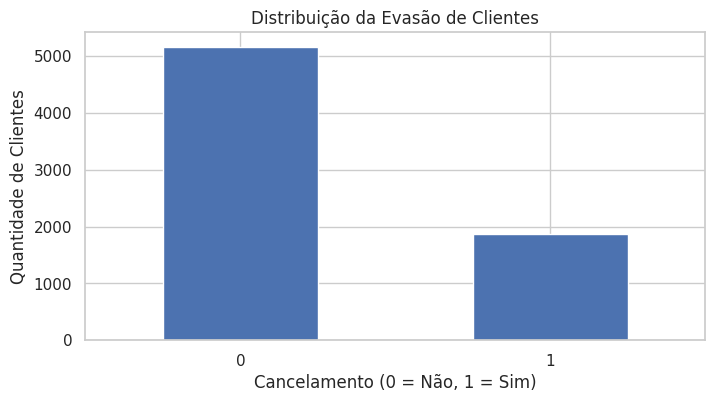

In [ ]:
plt.figure(figsize=(8, 4))                                                      # Configurações do gráfico.
df['cancelamento'].value_counts().plot(kind='bar')                              # Criação do gráfico.
plt.title('Distribuição da Evasão de Clientes')                                 # Criação do título.
plt.xlabel('Cancelamento (0 = Não, 1 = Sim)')                                   # Descrição do eixo X.
plt.ylabel('Quantidade de Clientes')                                            # Descrição do eixo Y.
plt.xticks(rotation=0)                                                          # Rotação dos rótulos do eixo X para facilitar a leitura.
plt.show()                                                                      # Exibe o gráfico.

In [ ]:
df['cancelamento'].value_counts(normalize=True) * 100                           # Calcula a porcentagem de clientes que saíram.

,proportion
cancelamento,
0,73.421502
1,26.578498


**Contagem de Evasão por Variáveis Categóricas.**

Agora, irei explorar como a evasão se distribui de acordo com variáveis categóricas, como gênero, tipo de contrato, método de pagamento, entre outras.

Essa análise pode revelar padrões interessantes, como, por exemplo, se clientes de determinados perfis têm maior tendência a cancelar o serviço, o que ajudará a direcionar ações estratégicas.

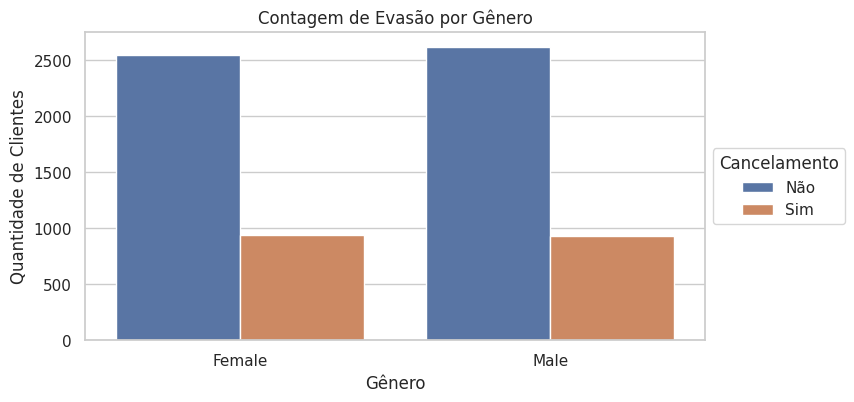

In [ ]:
plt.figure(figsize=(8, 4))                                                      # Configurações do gráfico.
sns.countplot(x='genero', hue='cancelamento', data=df)                          # Criação do gráfico.
plt.title('Contagem de Evasão por Gênero')                                      # Criação do título.
plt.xlabel('Gênero')                                                            # Descrição do eixo X.
plt.ylabel('Quantidade de Clientes')                                            # Descrição do eixo Y.
plt.legend(title='Cancelamento', labels=['Não', 'Sim'],                         # Criação da Legenda.
           loc='center left', bbox_to_anchor=(1, 0.5))                          # Posição da legenda.
plt.show()                                                                      # Exibe o gráfico.

A análise por gênero mostrou que a evasão ocorre de forma relativamente equilibrada entre homens e mulheres, indicando que o gênero, isoladamente, não é um fator determinante para o cancelamento.

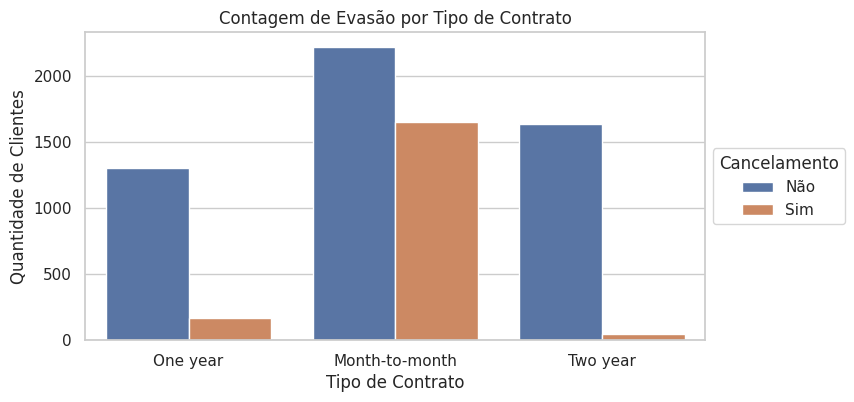

In [ ]:
plt.figure(figsize=(8, 4))                                                      # Configurações do gráfico.
sns.countplot(x='tipo_contrato', hue='cancelamento', data=df)                   # Criação do gráfico.
plt.title('Contagem de Evasão por Tipo de Contrato')                            # Criação do título.
plt.xlabel('Tipo de Contrato')                                                  # Descrição do eixo X.
plt.ylabel('Quantidade de Clientes')                                            # Descrição do eixo Y.
plt.legend(title='Cancelamento', labels=['Não', 'Sim'],                         # Criação da Legenda.
           loc='center left', bbox_to_anchor=(1, 0.5))                          # Posição da legenda.
plt.show()                                                                      # Exibe o gráfico.

Clientes com contrato mensal apresentaram maior taxa de evasão quando comparados aos contratos anuais ou bienais, indicando menor fidelização.

In [ ]:
df['tipo_contrato'].value_counts()                                              # Contagem de clientes por tipo de contrato.

,count
tipo_contrato,
Month-to-month,3875
Two year,1685
One year,1472


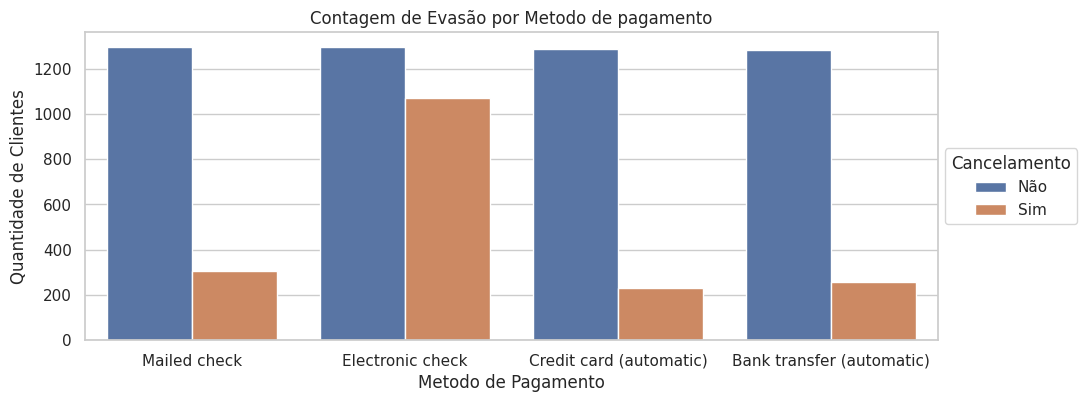

In [ ]:
plt.figure(figsize=(11, 4))                                                     # Configurações do gráfico.
sns.countplot(x='metodo_pagamento', hue='cancelamento', data=df)                # Criação do gráfico.
plt.title('Contagem de Evasão por Metodo de pagamento')                         # Criação do título.
plt.xlabel('Metodo de Pagamento')                                               # Descrição do eixo X.
plt.ylabel('Quantidade de Clientes')                                            # Descrição do eixo Y.
plt.legend(title='Cancelamento', labels=['Não', 'Sim'],                         # Criação da Legenda.
           loc='center left', bbox_to_anchor=(1, 0.5))                          # Posição da legenda.
plt.show()                                                                      # Exibe o gráfico.

Clientes que utilizam cheque eletrônico (Electronic check) apresentaram maior taxa de evasão quando comparados aos métodos automáticos, como cartão de crédito e transferência bancária, sugerindo que a automatização do pagamento pode contribuir para a redução do churn.

In [ ]:
df['metodo_pagamento'].value_counts()                                           # Contagem de clientes por tipo de contrato.

,count
metodo_pagamento,
Electronic check,2365
Mailed check,1604
Bank transfer (automatic),1542
Credit card (automatic),1521


**Contagem de Evasão por Variáveis Numéricas.**

Exploraremos como variáveis numéricas, como "total gasto" ou "tempo de contrato", se distribuem entre clientes que cancelaram e os que não cancelaram.

Essa análise ajuda a entender se certos valores numéricos estão mais associados à evasão, oferecendo insights sobre os fatores que influenciam o comportamento dos clientes.

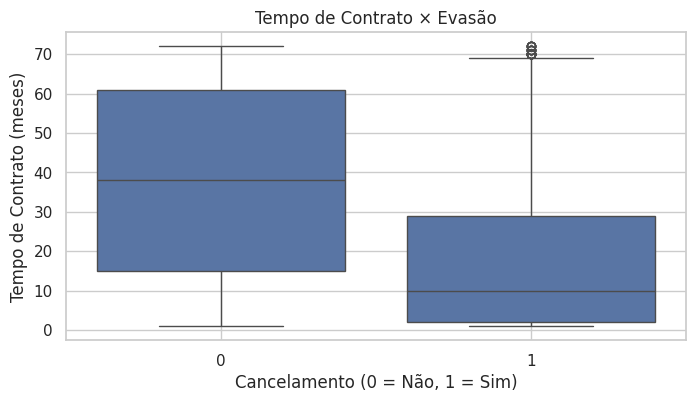

In [ ]:
plt.figure(figsize=(8, 4))                                                      # Configuração do gráfico.
sns.boxplot(x='cancelamento', y='tempo_contrato_meses', data=df)                # Criação do gráfico.
plt.title('Tempo de Contrato × Evasão')                                         # Título do gráfico.
plt.xlabel('Cancelamento (0 = Não, 1 = Sim)')                                   # Descrição do eixo X.
plt.ylabel('Tempo de Contrato (meses)')                                         # Descrição do eixo Y.
plt.grid(True)                                                                  # Adiciona grade ao gráfico.
plt.show()                                                                      # Exibe o gráfico.

O boxplot mostrou que clientes que cancelaram tendem a ter menor tempo de contrato, indicando que a evasão ocorre com maior frequência nos primeiros meses de relacionamento com a empresa.

In [ ]:
df['tempo_contrato_meses'].describe()                                           # Estatísticas descritivas da variável tempo de contrato.

,tempo_contrato_meses
count,7032.000000
mean,32.421786
std,24.545260
min,1.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


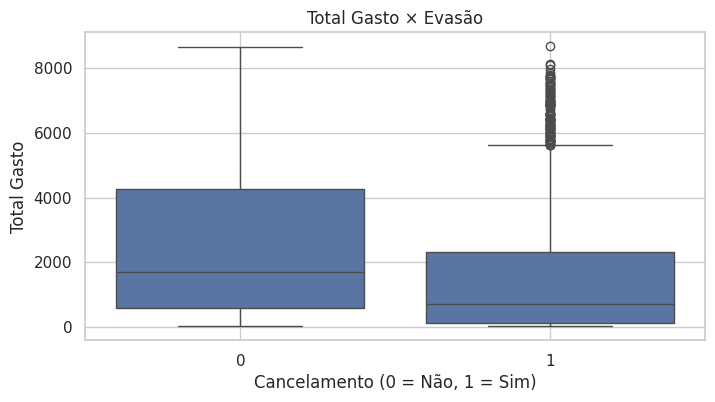

In [ ]:
plt.figure(figsize=(8, 4))                                                      # Configurações do gráfico.
sns.boxplot(x='cancelamento', y='total_cobrado', data=df)                       # Criação do gráfico.
plt.title('Total Gasto × Evasão')                                               # Título do gráfico.
plt.xlabel('Cancelamento (0 = Não, 1 = Sim)')                                   # Descrição do eixo X.
plt.ylabel('Total Gasto')                                                       # Descrição do eixo Y.
plt.grid(True)                                                                  # Adiciona grade ao gráfico.
plt.show()                                                                      # Exibe o gráfico.

Observou-se que clientes que permanecem ativos possuem um total gasto significativamente maior, o que é esperado, já que permanecem por mais tempo na base.

In [ ]:
df['total_cobrado'].describe()                                                  # Estatísticas descritivas da variável tempo de contrato.

,total_cobrado
count,7032.000000
mean,2283.300441
std,2266.771362
min,18.800000
25%,401.450000
50%,1397.475000
75%,3794.737500
max,8684.800000


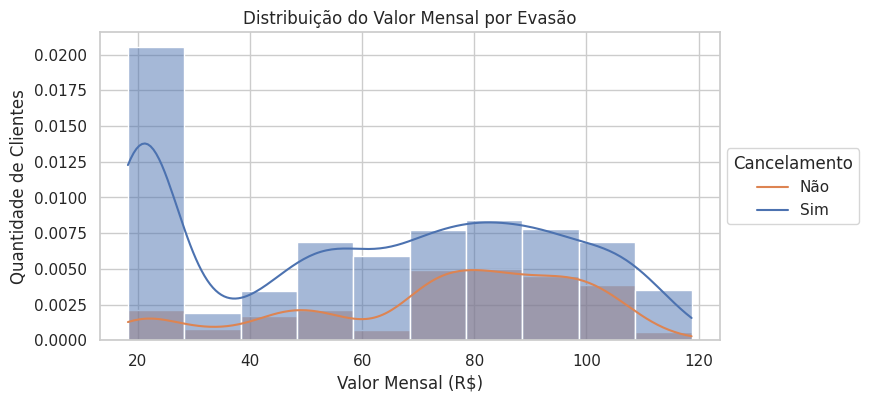

In [ ]:
plt.figure(figsize=(8, 4))                                                      # Configurações do gráfico.
sns.histplot(data=df, x='valor_mensal', hue='cancelamento', bins=10,            # Criação do gráfico.
             kde=True, stat='density')
plt.title('Distribuição do Valor Mensal por Evasão')                            # Título do gráfico.
plt.xlabel('Valor Mensal (R$)')                                                 # Descrição correta do eixo X.
plt.ylabel('Quantidade de Clientes')                                            # Descrição do eixo Y.
plt.legend(title='Cancelamento', labels=['Não', 'Sim'],                         # Criação da legenda.
           loc='center left', bbox_to_anchor=(1, 0.5))                          # Posição da legenda.
plt.grid(True)                                                                  # Adiciona grade ao gráfico.
plt.show()                                                                      # Exibe o gráfico.

A distribuição do valor mensal revelou que clientes com valores mensais mais elevados apresentam maior propensão ao cancelamento, sugerindo sensibilidade ao preço.

In [ ]:
df['valor_mensal'].describe()                                                   # Estatísticas descritivas da variável tempo de contrato.

,valor_mensal
count,7032.000000
mean,64.798208
std,30.085974
min,18.250000
25%,35.587500
50%,70.350000
75%,89.862500
max,118.750000


**Análise de Correlação entre Variáveis.**

Como um passo adicional, irei explorar a correlação entre diferentes variáveis do dataset. Isso pode ajudar a identificar quais fatores têm maior relação com a evasão de clientes, como:

- Relação entre a conta diária e a evasão.
- Quantidade de serviços contratados afeta a probabilidade de churn.


In [ ]:
df[['cancelamento', 'contas_diarias', 'valor_mensal', 'total_cobrado']].corr()  # Calcula a correlação entre cancelamento e variáveis numéricas selecionadas.

,cancelamento,contas_diarias,valor_mensal,total_cobrado
cancelamento,1.000000,0.192858,0.192858,-0.199484
contas_diarias,0.192858,1.000000,1.000000,0.651065
valor_mensal,0.192858,1.000000,1.000000,0.651065
total_cobrado,-0.199484,0.651065,0.651065,1.000000


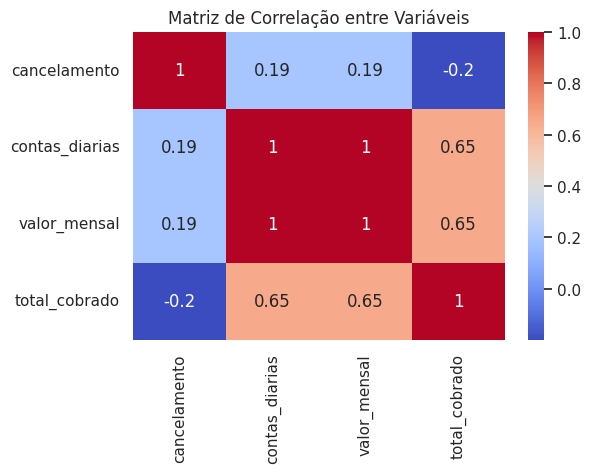

In [ ]:
plt.figure(figsize=(6, 4))                                                      # Configurações do gráfico.
sns.heatmap(df[['cancelamento', 'contas_diarias', 'valor_mensal',               # Criação do gráfico.
        'total_cobrado']].corr(),annot=True,cmap='coolwarm')
plt.title('Matriz de Correlação entre Variáveis')                               # Criação do Título.
plt.show()                                                                      # Exibe o gráfico.

- Correlação positiva moderada entre valor_mensal, contas_diarias e total_cobrado;

- Correlação negativa entre total_cobrado e cancelamento, reforçando que clientes mais antigos e engajados cancelam menos.

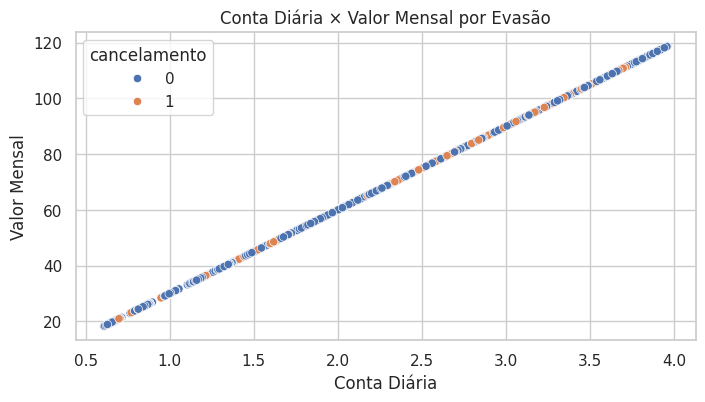

In [ ]:
plt.figure(figsize=(8, 4))                                                      # Configurações do gráfico.
sns.scatterplot(x='contas_diarias', y='valor_mensal',                           # Criação do Gráfico.
                hue='cancelamento', data=df)
plt.title('Conta Diária × Valor Mensal por Evasão')                             # Criação do Título.
plt.xlabel('Conta Diária')                                                      # Descrição do eixo X.
plt.ylabel('Valor Mensal')                                                      # Descrição do eixo Y.
plt.show()                                                                      # Exibe o gráfico.

###**Relátorio Final.**



**Introdução.**

A evasão de clientes é um dos principais desafios enfrentados por empresas de telecomunicações, pois impacta diretamente a receita e os custos de aquisição de novos clientes.
O objetivo desta análise é identificar padrões e fatores associados ao cancelamento de clientes, utilizando dados históricos da empresa Telecom X.

A partir da análise exploratória dos dados, busquei compreender o perfil dos clientes que tendem a cancelar o serviço e gerar insights que possam auxiliar na redução da evasão e na tomada de decisões estratégicas.

**Limpeza e Tratamento de Dados**

Inicialmente, os dados foram importados para o ambiente do Google Colab e passaram por um processo de limpeza e tratamento, incluindo:

- Verificação e tratamento de valores ausentes;
- Conversão de variáveis categóricas em formatos adequados para análise;
- Padronização de colunas como cancelamento, transformando valores como “Sim” e “Não” em representações numéricas (1 e 0);
- Criação da variável contas_diarias, derivada a partir do valor mensal, para enriquecer a análise;
- Verificação de tipos de dados e consistência das informações.

Esses passos garantiram maior confiabilidade e qualidade para as análises realizadas.

**Análise Exploratória de Dados (EDA).**

Durante a análise exploratória, foram utilizadas visualizações gráficas para identificar padrões e relações entre as variáveis e a evasão de clientes.

- Tempo de Contrato × Evasão:
O boxplot mostrou que clientes que cancelaram tendem a ter menor tempo de contrato, indicando que a evasão ocorre com maior frequência nos primeiros meses de relacionamento com a empresa.

- Valor Mensal × Evasão:
A distribuição do valor mensal revelou que clientes com valores mensais mais elevados apresentam maior propensão ao cancelamento, sugerindo sensibilidade ao preço.

- Total Gasto × Evasão:
Observou-se que clientes que permanecem ativos possuem um total gasto significativamente maior, o que é esperado, já que permanecem por mais tempo na base.

- Tipo de Contrato × Evasão:
Clientes com contrato mensal apresentaram maior taxa de evasão quando comparados aos contratos anuais ou bienais, indicando menor fidelização.

- Método de Pagamento × Evasão:
Clientes que utilizam cheque eletrônico (Electronic check) apresentaram maior taxa de evasão quando comparados aos métodos automáticos, como cartão de crédito e transferência bancária, sugerindo que a automatização do pagamento pode contribuir para a redução do churn.

- Gênero × Evasão: A análise por gênero mostrou que a evasão ocorre de forma relativamente equilibrada entre homens e mulheres, indicando que o gênero, isoladamente, não é um fator determinante para o cancelamento.

- Análise de Correlação: A matriz de correlação indicou correlação positiva moderada entre valor_mensal, contas_diarias e total_cobrado;

Correlação negativa entre total_cobrado e cancelamento, reforçando que clientes mais antigos e engajados cancelam menos.

**Conclusões e Insights.**

A análise permitiu identificar alguns fatores-chave associados à evasão de clientes:

- Clientes com pouco tempo de contrato são mais propensos ao churn;

- Valores mensais elevados aumentam a chance de cancelamento;

- Contratos mensais apresentam maior taxa de evasão;

- A ausência de serviços adicionais está relacionada a maior churn;

- Clientes mais engajados e com maior gasto acumulado tendem a permanecer na base.

- A análise por gênero indicou que a evasão ocorre de forma equilibrada, sugerindo que fatores demográficos não são determinantes isoladamente;

- O método de pagamento mostrou forte relação com o churn, com maior evasão entre clientes que utilizam cheque eletrônico, enquanto métodos automáticos apresentam maior retenção.

**Recomendações.**

Com base nos insights obtidos, recomenda-se:

- Criar estratégias de retenção nos primeiros meses de contrato, como ofertas de boas-vindas;

- Oferecer descontos ou planos personalizados para clientes com valores mensais mais altos;

- Incentivar a migração de clientes para contratos de maior duração;

- Promover pacotes com serviços adicionais, aumentando o valor percebido;

- Incentivar o uso de métodos de pagamento automáticos, reduzindo a probabilidade de cancelamento;

- Utilizar esses dados como base para futuros modelos preditivos de churn.

**Consideração Final.**

Esta análise demonstrou como o uso de dados e visualizações pode apoiar decisões estratégicas para reduzir a evasão de clientes. Os insights obtidos fornecem uma base sólida para ações de retenção e análises mais avançadas no futuro.